# Housing Price Prediction using Machine Learning

## Objective
The goal of this project is to predict housing prices using machine learning techniques.

We compare Linear Regression and Random Forest models and evaluate performance using R² and RMSE metrics.

This project follows a complete end-to-end ML pipeline including:
- Data cleaning
- Feature encoding
- Model training
- Cross-validation
- Model interpretation


1. Introduction
2. Dataset Overview
3. Data Exploration (EDA)
4. Data Preprocessing
5. Feature Engineering
6. Model Training
7. Model Evaluation
8. Feature Importance
9. Conclusion


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
df = pd.read_csv("housing.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


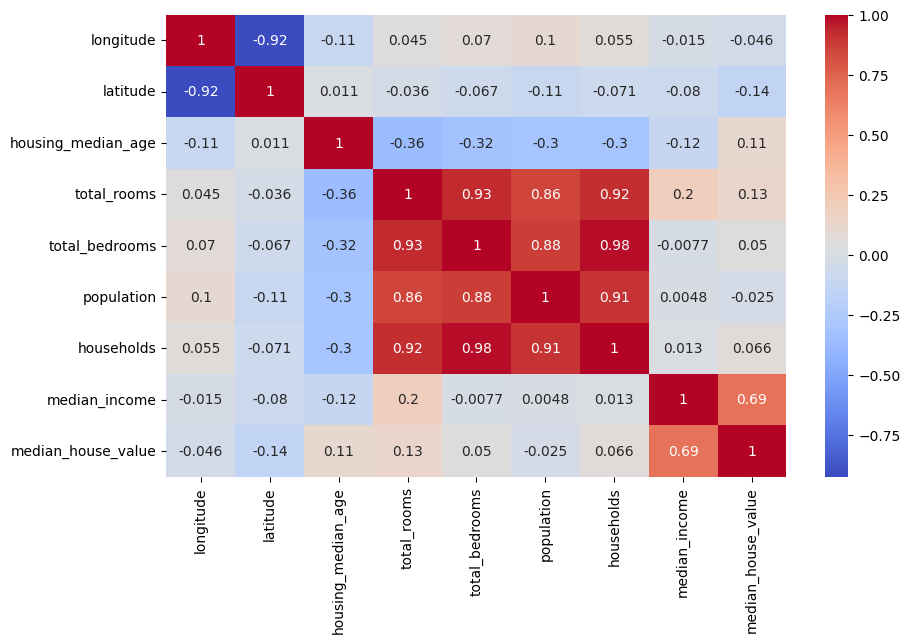

In [8]:
df.info()
df.describe()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

plt.show()


In [12]:
df = df.dropna()
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)

X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression R2: 0.6488402154431994
Linear Regression RMSE: 69297.7166911303


In [16]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest R2: 0.826015274343193
Random Forest RMSE: 48777.78774573444


In [20]:
rf = RandomForestRegressor(n_estimators=50, random_state=42)

scores = cross_val_score(rf, X_train, y_train, cv=3, scoring='r2')

print("CV R2 Mean:", scores.mean())


CV R2 Mean: 0.8081796729110295


In [21]:
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

importance_df.head(10)


,Feature,Importance
7,median_income,0.484900
8,ocean_proximity_INLAND,0.142839
0,longitude,0.109418
1,latitude,0.103620
2,housing_median_age,0.051378
5,population,0.032646
3,total_rooms,0.023917
4,total_bedrooms,0.022198
6,households,0.019298
11,ocean_proximity_NEAR OCEAN,0.007936


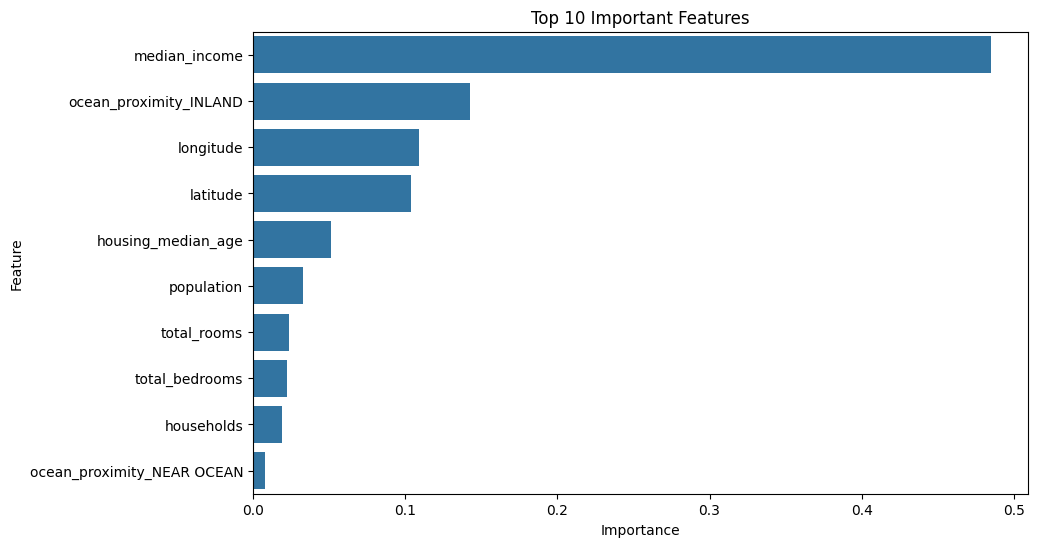

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=importance_df.head(10))
plt.title("Top 10 Important Features")
plt.show()


## Conclusion

Random Forest outperformed Linear Regression with an R² score of approximately 0.80.

This suggests that nonlinear models are more suitable for housing price prediction.

Feature importance analysis shows that median income and location-related features have the strongest impact on house prices.

Future improvements could include:
- Hyperparameter tuning
- Trying Gradient Boosting (XGBoost)
- Adding more engineered features
